In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
test_data = pd.read_csv("test.csv")

In [3]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
test_data.shape

(1459, 80)

In [5]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

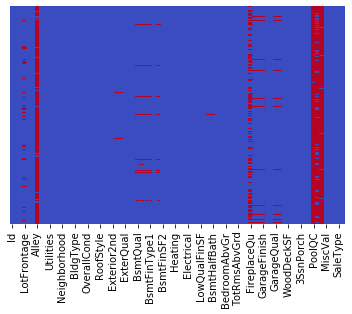

In [7]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap="coolwarm")

In [8]:
test_data.drop(['Alley','MiscFeature','Fence','PoolQC'],axis=1,inplace=True)

In [19]:
test_data['MSZoning'] = test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])
test_data['Utilities'] = test_data['Utilities'].fillna(test_data['Utilities'].mode()[0])
test_data['Exterior1st'] = test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['Exterior2nd'] = test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['MasVnrType'] = test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['BsmtQual'] = test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
test_data['BsmtCond'] = test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])
test_data['KitchenQual'] = test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['Functional'] = test_data['Functional'].fillna(test_data['Functional'].mode()[0])
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode()[0])
test_data['GarageType'] = test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['GarageFinish'] = test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
test_data['GarageQual'] = test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
test_data['GarageCond'] = test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])
test_data['SaleType'] = test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])

In [20]:
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean())
test_data['BsmtFinSF1'] = test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())
test_data['BsmtFinSF2'] = test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mean())
test_data['BsmtUnfSF'] = test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mean())
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
test_data['BsmtFullBath'] = test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mean())
test_data['BsmtHalfBath'] = test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mean())
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].mean())
test_data['GarageCars'] = test_data['GarageCars'].fillna(test_data['GarageCars'].mean())
test_data['GarageArea'] = test_data['GarageArea'].fillna(test_data['GarageArea'].mean())

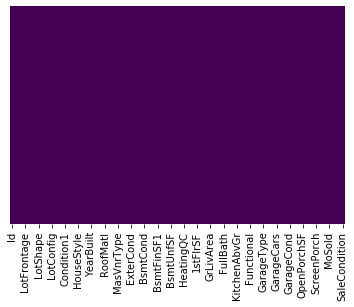

In [21]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [22]:
test_data.shape

(1459, 76)

In [23]:
test_data.to_csv("test_data.csv",index=False)